In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import missingno
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data
df=pd.read_csv("heart.csv")
df.head(15) #Loading the First Five Rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Let's Look The Dimensions Of The Data:
print(f'The Data-Set Contain {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set Contain 303 Rows and 14 Columns


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
#Let's calculate the percentage of blanks and filled values for all columns.
# loop through the columns and check the missing values
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :.1%}')

age - 0.0%
sex - 0.0%
cp - 0.0%
trtbps - 0.0%
chol - 0.0%
fbs - 0.0%
restecg - 0.0%
thalachh - 0.0%
exng - 0.0%
oldpeak - 0.0%
slp - 0.0%
caa - 0.0%
thall - 0.0%
output - 0.0%


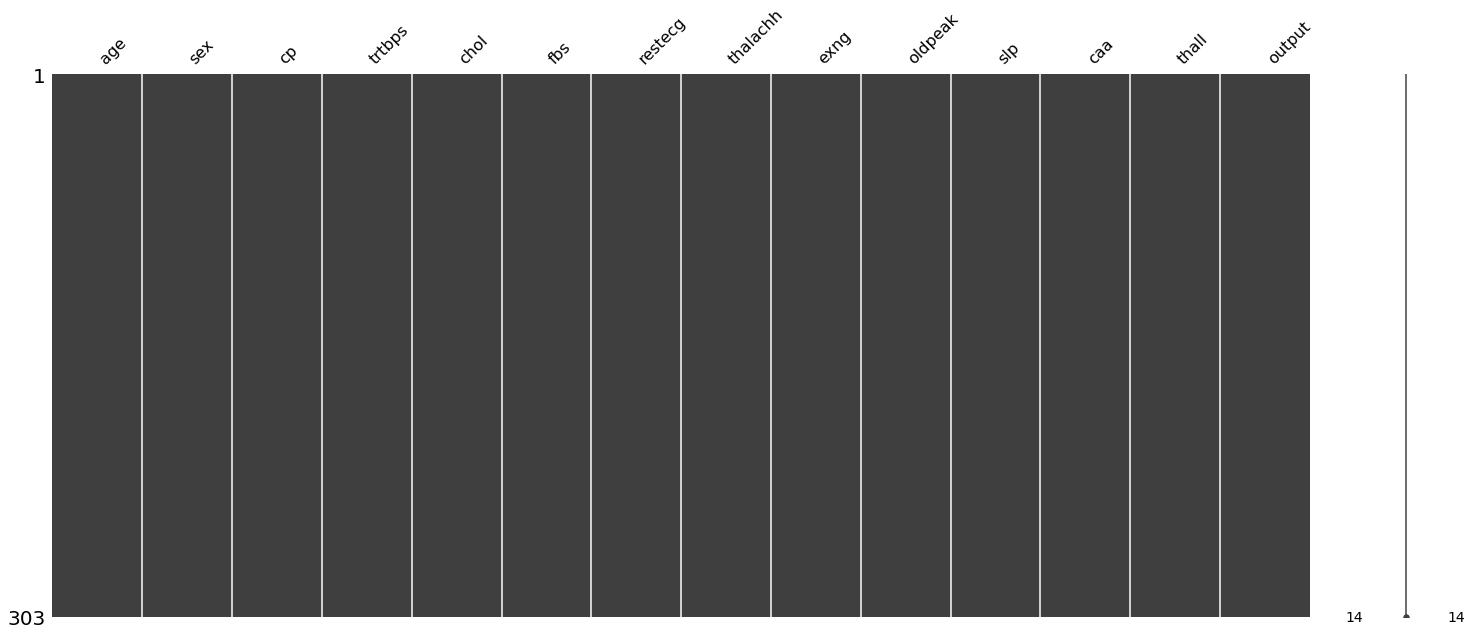

In [7]:
# Build a matrix of missing values
missingno.matrix(df, fontsize = 16)
plt.show()

In [8]:
#Check The Duplicates In the Data-Set:
df.duplicated().sum()

1

In [9]:
# We will drop the Duplicate value:
df=df.drop_duplicates(keep="first")

In [10]:
#descriptive analysis
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Checking the number of unique values in each column
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [23]:
df.nunique()

Age                         41
Sex                          2
Chest Pain Type              4
Resting Blood Pressure      49
Cholesterol                152
Fasting Blood Sugar          2
Resting ECG                  3
Max. Heart Rate             91
Exercise Induced Angina      2
Previous Peak               40
Slope                        3
No. Major Blood Vessels      5
Thal Rate                    4
Condition                    2
dtype: int64

In [51]:
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'Max.HeartRate',
       'ExerciseInducedAngina', 'PreviousPeak', 'Slope', 'No.MajorBloodVessels', 'ThalRate', 'Condition']

In [52]:
# Classifying data into numerical and categorical features.
numerical = ['Age','RestingBloodPressure','Cholesterol','Max.HeartRate','PreviousPeak']
categorical= ['Sex','ChestPainType','FastingBloodSugar','RestingECG','ExerciseInducedAngina','Slope','No.MajorBloodVessels','ThalRate']
print("The categorial cols are : ", categorical)
print("The continuous cols are : ", numerical)

The categorial cols are :  ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'Slope', 'No.MajorBloodVessels', 'ThalRate']
The continuous cols are :  ['Age', 'RestingBloodPressure', 'Cholesterol', 'Max.HeartRate', 'PreviousPeak']


findfont: Font family ['Sherif'] not found. Falling back to DejaVu Sans.


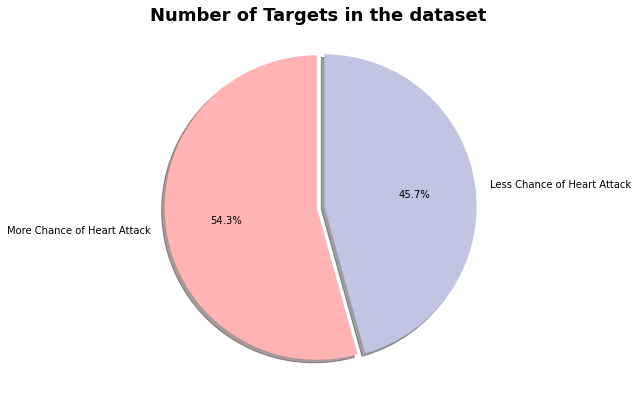

In [15]:
#Pie Chart
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = df['Condition'].value_counts(sort = True)

colors = ["#ffb3b3","#C2C4E2"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets in the dataset",y=0.9, family='Sherif', size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.show()

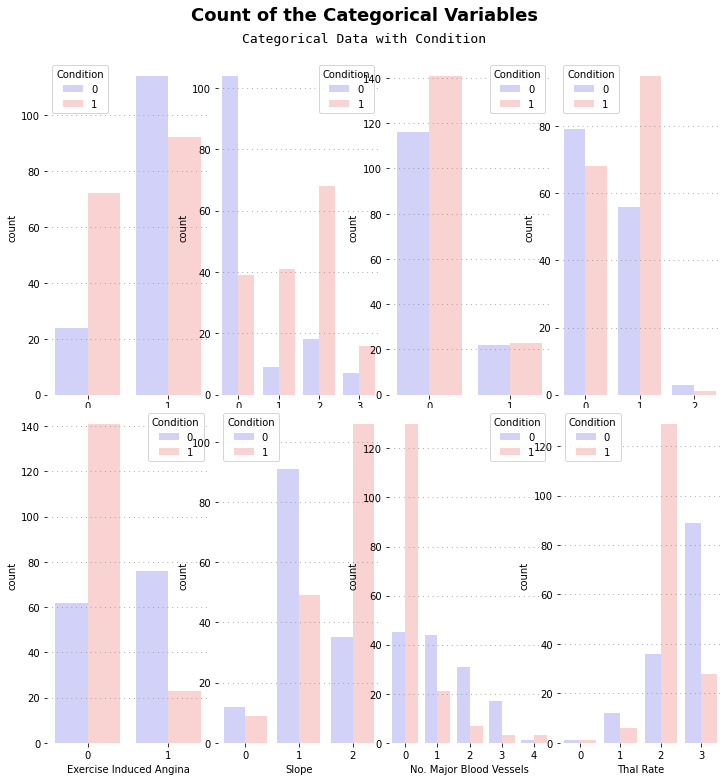

In [16]:
# Count Plot of Categorical Data with Condition
colors = ['#ccccff','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Count of the Categorical Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.33,1.02,"Categorical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in df[categorical]:
    ax=plt.subplot(241+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax=sns.countplot(data=df, x=i, hue='Condition', palette=colors, alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

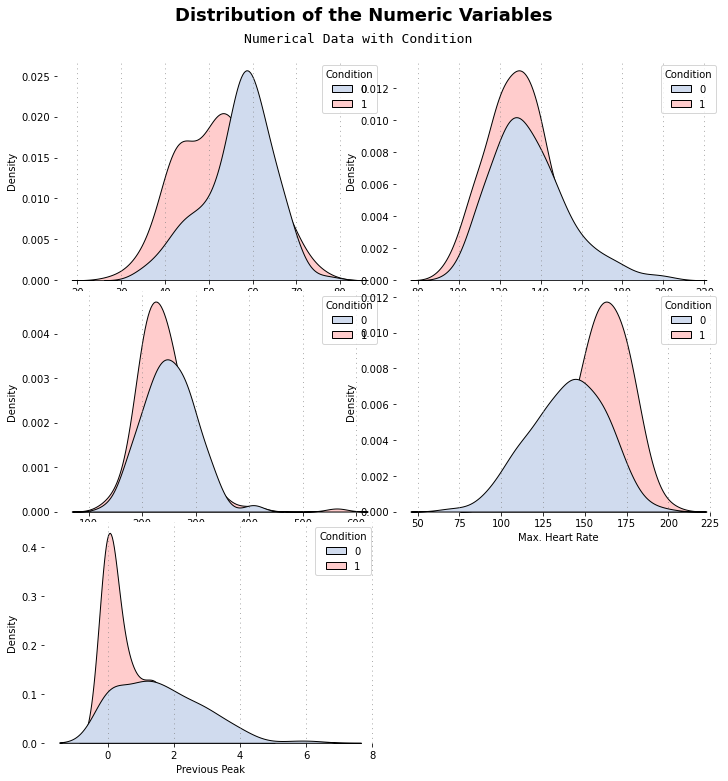

In [17]:
# Distribution Plot of Numerical Data with Condition
colors = ['#D0DBEE','#ffcccc']
j=0
fig=plt.figure(figsize=(10,10),constrained_layout =True)
plt.suptitle("Distribution of the Numeric Variables",y=1.07, family='Sherif', size=18, weight='bold')
fig.text(0.333,1.02,"Numerical Data with Condition", size=13, fontweight='light', fontfamily='monospace')
for i in df[numerical]:
    ax=plt.subplot(321+j)
    ax.set_aspect('auto')
    ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
    ax=sns.kdeplot(data=df, x=i, hue='Condition', palette=colors, fill=True, edgecolor='black', alpha=1)
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1

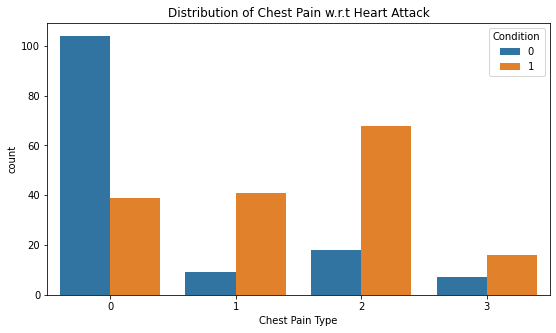

In [22]:
plt.figure(figsize = (9,5))
sns.countplot(
    data=df,
    x = "Chest Pain Type",
    hue="Condition",
)
plt.title("Distribution of Chest Pain w.r.t Heart Attack")
plt.show()

ChestPainType_0 Heart Attack Percentage: 27.27272727272727%
ChestPainType_1 Heart Attack Percentage: 82.0%
ChestPainType_2 Heart Attack Percentage: 79.06976744186046%
ChestPainType_3 Heart Attack Percentage: 69.56521739130434%



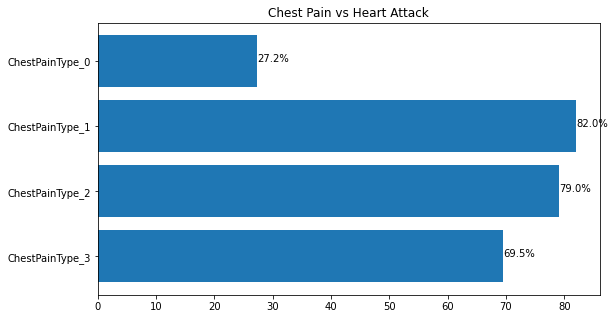

In [34]:
ChestPainType_val_counts = df.groupby("ChestPainType")["Condition"].value_counts()

x = []
y = []

for i in range(4):
    temp_per = (ChestPainType_val_counts[i][1] / (ChestPainType_val_counts[i][1]+ChestPainType_val_counts[i][0])) * 100
    x.append("ChestPainType_"+str(i))
    y.append(temp_per)
    print(f"ChestPainType_{i} Heart Attack Percentage: {temp_per}%")
    
print()

plt.figure(figsize = (9,5))
plt.barh(x[::-1], y[::-1])
  
for index, value in enumerate(y[::-1]):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Chest Pain vs Heart Attack")
plt.show()

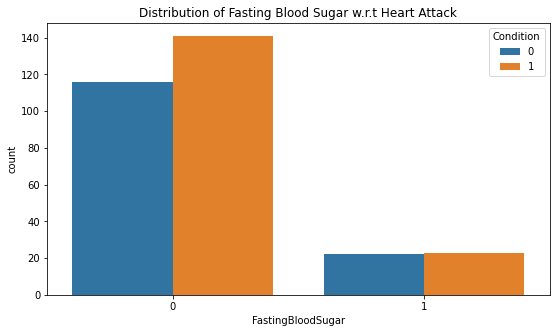

In [36]:
plt.figure(figsize = (9,5))
sns.countplot(
    data=df,
    x = "FastingBloodSugar",
    hue="Condition",
)
plt.title("Distribution of Fasting Blood Sugar w.r.t Heart Attack")
plt.show()

FBS heart Attack: 51.11111111111111%
No FBS heart Attack: 54.86381322957199%



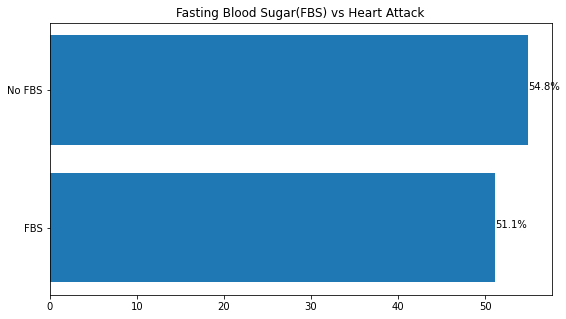

In [43]:
FastingBloodSugar_val_counts = df.groupby("FastingBloodSugar")["Condition"].value_counts()
fbs_heart_attack_percentage = (FastingBloodSugar_val_counts[1][1] / (FastingBloodSugar_val_counts[1][1]+FastingBloodSugar_val_counts[1][0])) * 100
no_fbs_exang_heart_attack_percentage = (FastingBloodSugar_val_counts[0][1] / (FastingBloodSugar_val_counts[0][1]+FastingBloodSugar_val_counts[0][0])) * 100

print(f"FBS heart Attack: {fbs_heart_attack_percentage}%")
print(f"No FBS heart Attack: {no_fbs_exang_heart_attack_percentage}%")

print()

plt.figure(figsize = (9,5))
x = ["FBS","No FBS"]
y = [fbs_heart_attack_percentage,no_fbs_exang_heart_attack_percentage]
plt.barh(x, y)
  
for index, value in enumerate(y):
    plt.text(value, index,
             str(value)[:4]+"%")

plt.title("Fasting Blood Sugar(FBS) vs Heart Attack")
plt.show()

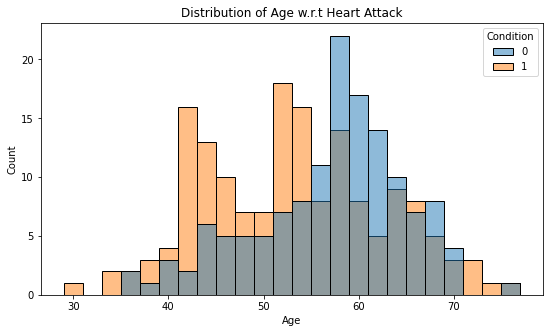

In [45]:
ax = plt.figure(figsize = (9,5))
sns.histplot(
    data=df,
    x = "Age",
    hue="Condition",
    binwidth=2
)
plt.title("Distribution of Age w.r.t Heart Attack")
plt.show()

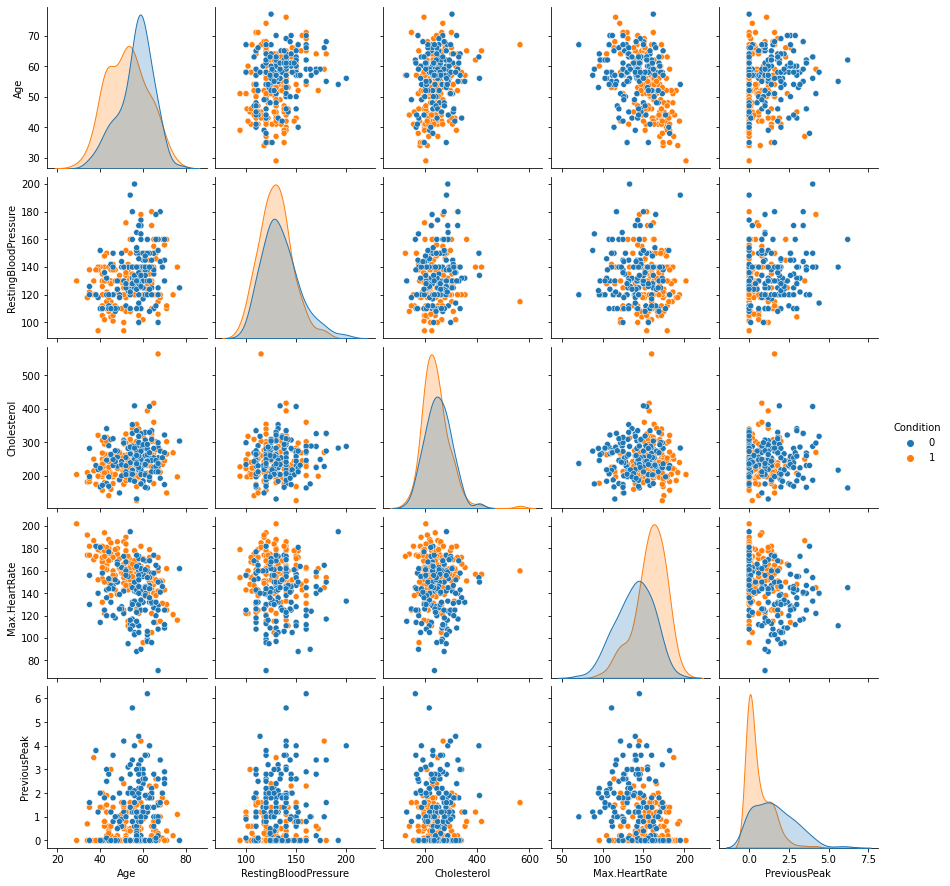

In [53]:
continuous_var_cols = ['Age','RestingBloodPressure','Cholesterol','Max.HeartRate','PreviousPeak','Condition']

sns.pairplot(df[continuous_var_cols], hue="Condition")
plt.show()

In [60]:
for col in continuous_var_cols[:-1]:
    plt.figure(figsize = (10,15))
    sns.histplot(
        data=df,
        x = numerical,
        hue="Condition",
        binwidth=10,
        kde=True
    )
    plt.title(f"Distribution of {col.upper()} w.r.t Heart Attack")
    plt.show()
    print()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 302 and the vector passed to `x` has length 5.

<Figure size 720x1080 with 0 Axes>